In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


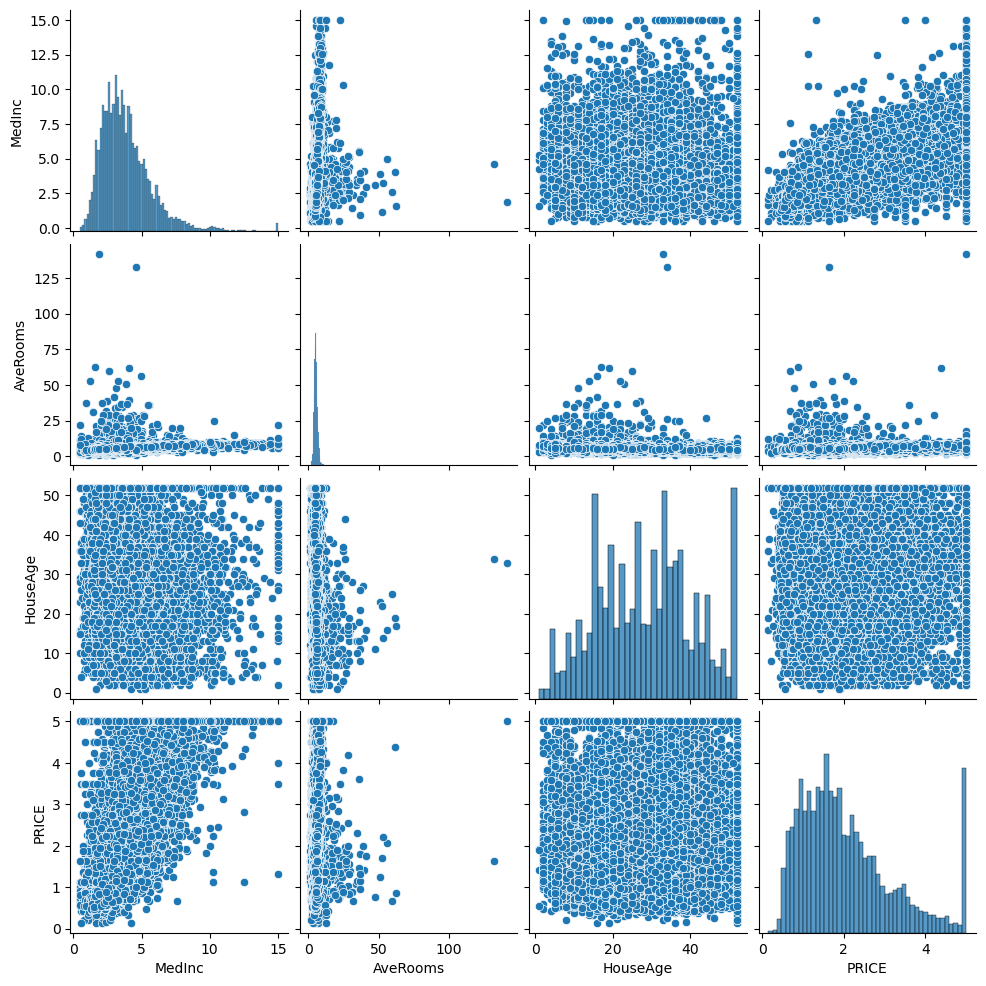

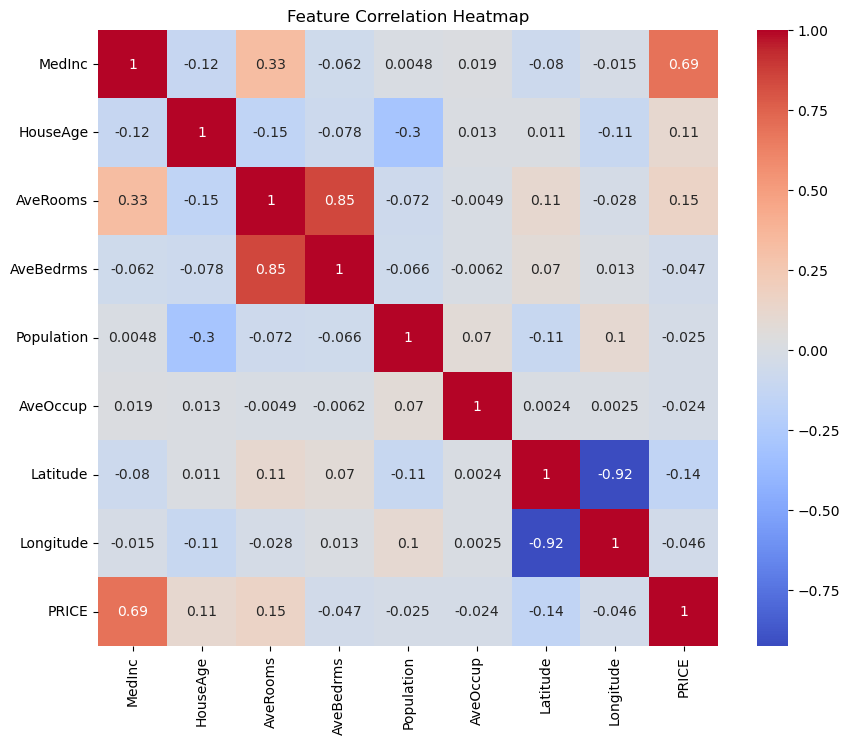

In [3]:
# Load California Housing data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='PRICE')

# Combine features and target into one DataFrame for analysis
df = pd.concat([X, y], axis=1)
print(df.head())

# Pairplot of selected features
sns.pairplot(df[['MedInc', 'AveRooms', 'HouseAge', 'PRICE']])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


R² Score: 0.58
Mean Squared Error: 0.56


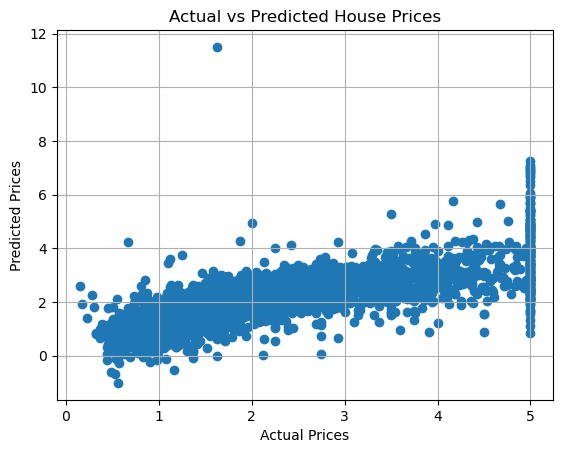

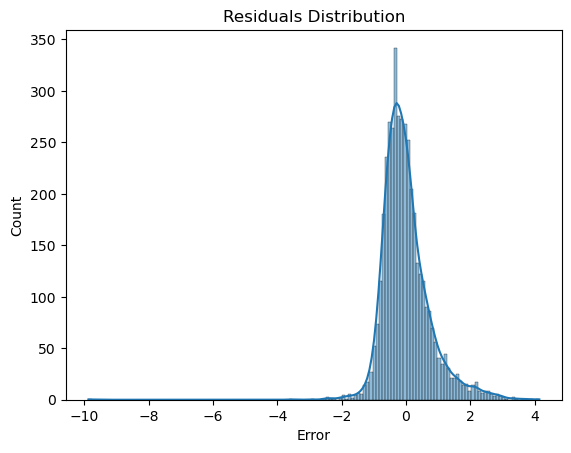

In [6]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.show()


### 📝 Conclusion & Insights

The linear regression model was trained using the California Housing dataset. The key steps included data preprocessing through standard scaling, model training, and evaluation using R^2 score and Mean Squared Error (MSE).

- **R^2 Score:** Indicates how well the model explains the variability of the target variable. In this case, the R^2 score was moderate, suggesting the model captures a fair amount of variance in housing prices.
- **Mean Squared Error:** Represents the average squared difference between actual and predicted values, which helps measure prediction accuracy.
- **Residuals Plot:** The residuals were roughly normally distributed, indicating a decent linear fit, although some non-linearity and noise were present in the predictions.

This task demonstrated how linear regression can be used for price prediction and how visual tools like residual and scatter plots help evaluate model performance.
